# AdaBoost (Regresion)

## 1. Librerias y configuraciones previas


In [1]:
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd

# Almacenar en caché los resultados de funciones en el disco
# ==============================================================================
import joblib


# Gestion de librerias
# ==============================================================================
from importlib import reload


# Preprocesado y modelado
# ==============================================================================

#creación de modelos
from sklearn.ensemble import AdaBoostRegressor


#Escalar Variables
from sklearn.preprocessing import MinMaxScaler

#import statsmodels.api as sm
import math

#evaluacion de variables
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ParameterGrid
from sklearn.inspection import permutation_importance
import multiprocessing


# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns


# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

## 2. Funciones

In [2]:
#reload(utils.funciones)

# Funciones externas
# ==============================================================================
from utils.funciones import multiple_plot

## 3. Carga del dataset

In [3]:
#Se crea un dataframe d con los datos obtenidos de archivo de entrada
d=pd.read_csv('./datasets/01_carDetailsV4_Prep.csv')

In [4]:
## Cargar datos con colab
## =============================================================================

#from google.colab import drive 
#import os

#drive.mount('/gdrive')

In [5]:
#os.chdir("/gdrive/MyDrive/ModelosCuantitativosPython/Notebooks")
#!ls

In [6]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1441 entries, 0 to 1440
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Price               1441 non-null   float64
 1   Year                1441 non-null   float64
 2   Kilometer           1441 non-null   float64
 3   Engine              1441 non-null   float64
 4   Length              1441 non-null   float64
 5   Width               1441 non-null   float64
 6   Height              1441 non-null   float64
 7   Seating Capacity    1441 non-null   float64
 8   Fuel Tank Capacity  1441 non-null   float64
 9   Fuel Type           1441 non-null   object 
 10  Transmission        1441 non-null   object 
 11  Owner               1441 non-null   object 
 12  Seller Type         1441 non-null   object 
 13  Drivetrain          1441 non-null   object 
 14  PriceRange          1441 non-null   int64  
dtypes: float64(9), int64(1), object(5)
memory usage: 169.0+

## 4. Visualización de datos

### Variables de entrada

In [7]:
#Lista de variables categóricas
catCols = d.select_dtypes(include = ["object", 'category']).columns.tolist()

d[catCols].head(2)

,Fuel Type,Transmission,Owner,Seller Type,Drivetrain
0,Petrol,Automatic,First,Individual,FWD
1,Diesel,Automatic,First,Corporate,AWD


In [8]:
#Lista de variables numéricas

numCols=d.select_dtypes(include = ['float64','float64','int32','int64']).columns.tolist()
d[numCols].head(2)

,Price,Year,Kilometer,Engine,Length,Width,Height,Seating Capacity,Fuel Tank Capacity,PriceRange
0,9540.0,2021.0,9000.0,1199.0,3993.0,1677.0,1532.0,5.0,35.0,1
1,10500.0,2014.0,99000.0,2199.0,4690.0,1880.0,1690.0,7.0,64.0,1


In [9]:
##Visualización de frecuencia de instancias para variables categóricas
#multiple_plot(3, d , catCols, None, 'countplot', 'Frecuencia de instancias para variables categóricas',30)

In [10]:
#Visualización por medio de gráficos de caja de bigotes para las variables categóricas con respecto al precio
#multiple_plot(3, d , catCols, 'Price', 'boxplot', 'Distribución de la variable Make vs. el Price',30)

In [11]:
#Visualización de variables numéricas con respecto al precio
#multiple_plot(1, d , numCols, None, 'scatterplot', 'Relación entre las variables numéricas',30)

In [12]:
#Eliminar la variable de salida de la lista de variable numéricas
numCols.remove('Price') 

### Variable de salida

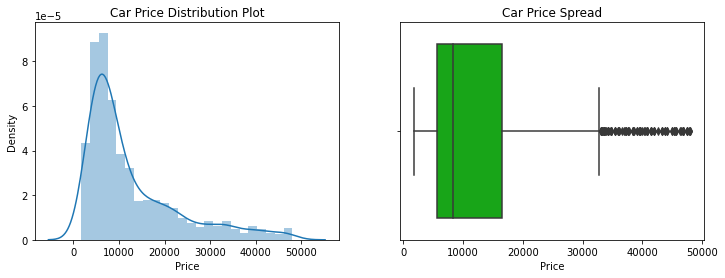

In [13]:
#Histográma y caja de bigotes del precio de los vehículos

plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.title('Car Price Distribution Plot')
sns.distplot(d.Price)

plt.subplot(1,2,2)
plt.title('Car Price Spread')
sns.boxplot(x=d.Price, palette='nipy_spectral')

plt.show()

In [14]:
pd.set_option('display.float_format', lambda x: '%.0f' % x)

print(d.Price.describe(percentiles = [0.25,0.50,0.75,0.85,0.90,0.95,0.975,1]))

count    1441
mean    12601
std     10255
min      1740
25%      5580
50%      8388
75%     16500
85%     22500
90%     28800
95%     35880
97.5%   41400
100%    48000
max     48000
Name: Price, dtype: float64


## 5. Preparación de datos

### Creación de Variables Dummies

In [15]:
# Aplicación de la función de get_dummies

d =pd.get_dummies(d, drop_first=1)

In [16]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1441 entries, 0 to 1440
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Price                   1441 non-null   float64
 1   Year                    1441 non-null   float64
 2   Kilometer               1441 non-null   float64
 3   Engine                  1441 non-null   float64
 4   Length                  1441 non-null   float64
 5   Width                   1441 non-null   float64
 6   Height                  1441 non-null   float64
 7   Seating Capacity        1441 non-null   float64
 8   Fuel Tank Capacity      1441 non-null   float64
 9   PriceRange              1441 non-null   int64  
 10  Fuel Type_Otro          1441 non-null   uint8  
 11  Fuel Type_Petrol        1441 non-null   uint8  
 12  Transmission_Manual     1441 non-null   uint8  
 13  Owner_Fourth            1441 non-null   uint8  
 14  Owner_Second            1441 non-null   

## 6. Creación del modelo

### Dividir el conjunto de datos

In [17]:
#Se establece las variables de entrada 'X' y la variable de salida 'y'

X = d.drop(columns = "Price")
y = d['Price']

In [18]:
# División de los datos en train y test

#En este caso, el 80% de los datos se utilizarán para entrenar el modelo. 

X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y.values.reshape(-1,1), 
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

### Escalar Variables

In [19]:
#Se establecen las variables numéricas a escalar

#Num_vars se le asigna la lista con las variables numerivas para posteriormente escalarlas
num_vars = numCols

print(num_vars)

['Year', 'Kilometer', 'Engine', 'Length', 'Width', 'Height', 'Seating Capacity', 'Fuel Tank Capacity', 'PriceRange']


In [20]:
#Escalar Variables númericas

pd.set_option('display.float_format', lambda x: '%.4f' % x)

# Se crea un objeto MinMaxScaler
scaler = MinMaxScaler()

# Se escalan los valores del dataset entrenamiento y prueba de las columnas numéricas
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])
X_test[num_vars] = scaler.fit_transform(X_test[num_vars])

X_train[num_vars].head(2)

,Year,Kilometer,Engine,Length,Width,Height,Seating Capacity,Fuel Tank Capacity,PriceRange
99,0.8235,0.4393,0.1016,0.1992,0.2613,0.3195,0.5000,0.2192,0.2000
1251,0.8235,0.3630,0.1044,0.3231,0.3814,0.2908,0.5000,0.1370,0.2000


### Creación del modelo

**Parámetros importantes** 

- **n_estimators:** Especifica el número de estimadores (modelos base) en el conjunto de AdaBoost. Cuanto mayor sea el número de estimadores, más complejo será el modelo, pero también existe el riesgo de sobreajuste.

- **learning_rate:** Controla la contribución de cada estimador en el conjunto. Un valor más bajo reduce la influencia de cada estimador y puede mejorar la generalización del modelo.

- **base_estimator:** Especifica el estimador base utilizado en el conjunto. Por defecto, se utiliza DecisionTreeRegressor, pero también se puede especificar otro estimador de regresión.

- **random_state:** Controla la generación de números aleatorios para reproducibilidad.


In [21]:
# Crear y entrenar el modelo AdaBoost
model = AdaBoostRegressor(n_estimators=100, random_state=1)
model.fit(X_train, y_train)

AdaBoostRegressor(n_estimators=100, random_state=1)

### Evaluación del modelo

#### Error Cuadráico Medio (rmse) y el Coeficiente de Determinación $R^2$

In [22]:
# Error de test del modelo inicial
# ==============================================================================
predicciones = model.predict(X = X_test)

rmse = np.sqrt(mean_squared_error(y_true  = y_test, y_pred  = predicciones))
print(f"El error (rmse) de test es: {rmse}")

r2 = r2_score(y_test, predicciones)
print(f"El error (r2) de test es: {r2}")

El error (rmse) de test es: 4225.217072035646
El error (r2) de test es: 0.8207901397878218


## 7. Afinando el modelo (tuning)

### Preparacion de datos

In [23]:
# Nuevamente se asigna a 'X_Completo' y 'y_Completo' los datos entrada y salida respectivamente
X_Completo = X
y_Completo = y

# Se escalan los datos numéricos de entrada
X_Completo[num_vars] = scaler.fit_transform(X_Completo[num_vars])

In [24]:
# Guardar el scaler
joblib.dump(scaler, './modelos/scaler/minmaxFull_carDetailsV4.pkl')

['./modelos/scaler/minmaxFull_carDetailsV4.pkl']

### Identificando los mejores hiperparámetros

In [25]:
#Se entrena el modelo con múltiples hiperparámetros buscando el mejor


# Definir el modelo AdaBoostRegressor
modelAdaB = AdaBoostRegressor(random_state=1)


CV = 10

parameters = {'n_estimators': range(1, 100, 5),
             'learning_rate':[.001,0.01,.1]
             }

grid_AdaB = GridSearchCV(
                        estimator  = modelAdaB,
                        param_grid = parameters,
                        n_jobs     = - 1,
                        cv         = CV, 
                        refit      = True,
                        verbose    = 3,
                        return_train_score = True
                       )

grid_AdaB.fit(X = X_Completo, y = y_Completo)

Fitting 10 folds for each of 60 candidates, totalling 600 fits


GridSearchCV(cv=10, estimator=AdaBoostRegressor(random_state=1), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1],
                         'n_estimators': range(1, 100, 5)},
             return_train_score=True, verbose=3)

In [26]:
# Resultados
# ==============================================================================
resultados = pd.DataFrame(grid_AdaB.cv_results_)
resultados.filter(regex = '(param*|mean_t|std_t)') \
    .drop(columns = 'params') \
    .sort_values('mean_test_score', ascending = False) \
    .head(4)

,param_learning_rate,param_n_estimators,mean_test_score,std_test_score,mean_train_score,std_train_score
59,0.1000,96,0.8301,0.0279,0.8598,0.0047
58,0.1000,91,0.8291,0.0283,0.8584,0.0044
57,0.1000,86,0.8275,0.0296,0.8569,0.0040
56,0.1000,81,0.8256,0.0300,0.8553,0.0042


In [27]:
pd.set_option('display.float_format', lambda x: '%.4f' % x)


# Obtener los resultados del grid search
results_grid_AdaB = pd.DataFrame(grid_AdaB.cv_results_)


# Seleccionar las columnas deseadas
columns_grid_AdaB = ['param_learning_rate']  + \
                    ['param_n_estimators']  + \
                    ['mean_test_score', 'std_test_score']  + \
                    [f'split{i}_test_score' for i in range(CV)]

# Filtrar y mostrar los resultados
results_grid_AdaB_filtered = results_grid_AdaB[columns_grid_AdaB]

# Crear la columna scoreWithStd: f1 / std
results_grid_AdaB_filtered['scoreWithStd'] = results_grid_AdaB_filtered.apply(
    lambda row: row['mean_test_score'] / row['std_test_score'] if row['std_test_score'] != 0 else 0,
    axis=1
)

# Encuentra el índice del máximo valor en la columna scoreWithStd
indice_max_scoreWithStd = results_grid_AdaB_filtered['scoreWithStd'].idxmax()

# Mostrar los scores promedios por cada parámetro
results_grid_AdaB_filtered[['param_learning_rate', 'param_n_estimators','mean_test_score', 'std_test_score', 'scoreWithStd']]


,param_learning_rate,param_n_estimators,mean_test_score,std_test_score,scoreWithStd
0,0.0010,1,0.6970,0.0651,10.7083
1,0.0010,6,0.7522,0.0612,12.2965
2,0.0010,11,0.7607,0.0624,12.1805
3,0.0010,16,0.7619,0.0661,11.5225
4,0.0010,21,0.7635,0.0666,11.4572
5,0.0010,26,0.7648,0.0653,11.7157
6,0.0010,31,0.7656,0.0646,11.8602
7,0.0010,36,0.7652,0.0679,11.2710
8,0.0010,41,0.7668,0.0647,11.8470
9,0.0010,46,0.7676,0.0673,11.3973


In [28]:
# Se identifican los mejores hiperparámetros
best_params = grid_AdaB.best_params_
print('Best Parameters : ',best_params)

Best Parameters :  {'learning_rate': 0.1, 'n_estimators': 96}


In [29]:
# Top 3 de los mejores scores
results_grid_AdaB_filtered.sort_values(by='scoreWithStd', ascending=False).head(3)[
    ['param_learning_rate', 'param_n_estimators','mean_test_score', 'std_test_score', 'scoreWithStd']]

,param_learning_rate,param_n_estimators,mean_test_score,std_test_score,scoreWithStd
59,0.1000,96,0.8301,0.0279,29.8064
58,0.1000,91,0.8291,0.0283,29.2639
57,0.1000,86,0.8275,0.0296,27.9785


In [30]:
# Seleccionar el registro correspondiente al índice máximo
registro_max_scoreWithStd = results_grid_AdaB_filtered.loc[indice_max_scoreWithStd]

registro_max_scoreWithStd.transpose()

param_learning_rate    0.1000
param_n_estimators    96.0000
mean_test_score        0.8301
std_test_score         0.0279
split0_test_score      0.8398
split1_test_score      0.8242
split2_test_score      0.8340
split3_test_score      0.8579
split4_test_score      0.8092
split5_test_score      0.8377
split6_test_score      0.7569
split7_test_score      0.8552
split8_test_score      0.8450
split9_test_score      0.8415
scoreWithStd          29.8064
Name: 59, dtype: float64

In [31]:
results_grid_AdaB_filtered.loc[indice_max_scoreWithStd]['mean_test_score']

0.8301203033700577

In [32]:
results_grid_AdaB_filtered.loc[indice_max_scoreWithStd]

param_learning_rate    0.1000
param_n_estimators    96.0000
mean_test_score        0.8301
std_test_score         0.0279
split0_test_score      0.8398
split1_test_score      0.8242
split2_test_score      0.8340
split3_test_score      0.8579
split4_test_score      0.8092
split5_test_score      0.8377
split6_test_score      0.7569
split7_test_score      0.8552
split8_test_score      0.8450
split9_test_score      0.8415
scoreWithStd          29.8064
Name: 59, dtype: float64

In [33]:
# Se crea un modelo árbol de decisión con los mejores hiperparámetros 

modelAdaB = AdaBoostRegressor( n_estimators = int(results_grid_AdaB_filtered.loc[indice_max_scoreWithStd]["param_n_estimators"])
                               , learning_rate = results_grid_AdaB_filtered.loc[indice_max_scoreWithStd]['param_learning_rate']
                               , random_state = 1234)


#Se entrena el modelo con los datos completos
modelAdaB.fit(X_Completo, y_Completo)

AdaBoostRegressor(learning_rate=0.1, n_estimators=96, random_state=1234)

### Guardar modelo

In [35]:
#Se guardan los modelos de SVC

joblib.dump(modelAdaB, './modelos/regresion/ABoostR_CV.pkl')

['./modelos/regresion/ABoostR_CV.pkl']

#### Referencias

 
- *Machine learning con Python y Scikit-learn:*
    - https://www.cienciadedatos.net/documentos/py06_machine_learning_python_scikitlearn.html
    

- *scikit-learn:*    
    - https://scikit-learn.org/stable/
    - https://scikit-learn.org/stable/user_guide.html
  
  
- *Gráficas con  seaborn:*
    - https://ichi.pro/es/como-utilizar-python-seaborn-para-analisis-de-datos-exploratorios-28897898172180





- *Analítica de grandes datos:*
    - https://jdvelasq.github.io/courses/analitica-de-grandes-datos/index.html